# Introduction

This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.


**Data sources:**

`profiles.csv` was provided by Codecademy.com.

### Project Goals

In this project, the goal is to utilize the skills learned through Codecademy and apply machine learning techniques to a data set. The primary research question that will be answered is whether an OkCupid's user is a smoker or not can be predicted using other variables from their profiles. This project is important since many users find smoking as an deal-breaker of matches, and if users don't input their smoking status, OkCupid would like to predict whether a user is a smoker or not. 

### Data

The project has one data set provided by Codecademy called `profiles.csv`. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

### Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's smoking status, classification algorithms from the supervised and un-supervised learning family of machine learning models will be implemented.

### Evaluation

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and scores. 

## Import Python Modules

First import the modules being used for this project:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

## Loading the data

To analyze the user profiles from OkCupid, pandas will be used to load the dataset into a `DataFrame` so that it can be explored and visualized with Python.

Here `profiles.csv` is loaded into a `DataFrame` called `df`. The `DataFrame` is then briefly examined using `.head()` to check the contents.


In [3]:
df = pd.read_csv('profiles.csv')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


### The dataframe columns are:

In [4]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

### This is the meaning of every column: ###

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

### It seems that the database is big enough for machine-learning. It have almost 60,000 rows.

In [5]:
len(df)

59946

## Explore our data

### sex

division by sex:

In [6]:
df['sex'] = df['sex'].map({'f':'Female', 'm': 'Male'})

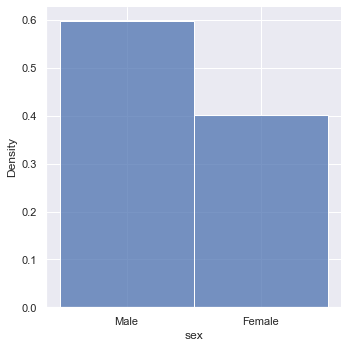

In [7]:
sns.displot(data = df, x='sex', kind= 'hist',stat = 'density')

 *We can see that in this dataframe, 60% of the users are men, 40% are women.* 

### Age

 *Let's see the sexs distribution by age:*

<AxesSubplot:xlabel='sex', ylabel='age'>

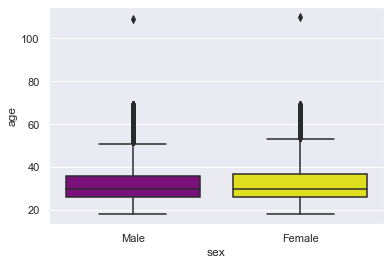

In [8]:
sns.boxplot(data=df, x='sex', y='age', palette=["darkmagenta", "yellow"])

Looks like that we have unreasnable outliers in the column of 'age'. Let's fix it and compare them to the mean age.

<AxesSubplot:xlabel='sex', ylabel='age'>

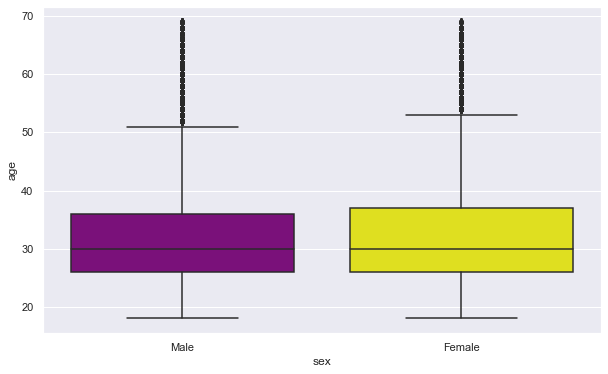

In [9]:
df['age'].dtype
df["age"] = np.where(df["age"] >100,32,df['age'])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='age', palette=["darkmagenta", "yellow"])

- **So, now we can see clearly the ages of the users. Most of the users are between 18-50. the median age of females and males is the same - 30.**

### Income ###

Let's look on the income column. the list below show how many users check every option in the 'income' field when they subscribe to the site.

* '-1' means that they keep it blank.

In [10]:
df['income'].value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

Almost 50,000 users didn't mention their income. I will clean the '-1' values and then plot the other values (exclude the outliers that reported 1M$ in the 'income' column)

[Text(0, 0, '0'),
 Text(20000, 0, '20k'),
 Text(40000, 0, '40k'),
 Text(60000, 0, '60k'),
 Text(80000, 0, '80k'),
 Text(100000, 0, '100k'),
 Text(120000, 0, '120k'),
 Text(140000, 0, '140k'),
 Text(160000, 0, '160k')]

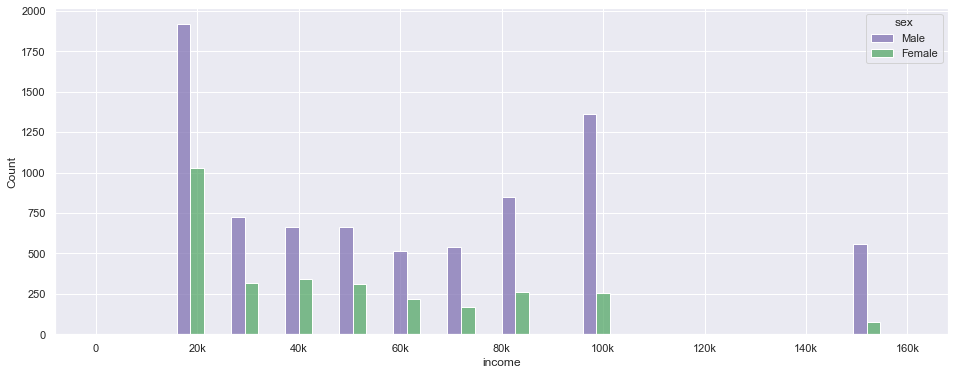

In [11]:
sns.set_theme()
plt.figure(figsize=(16, 6))
income_hist = sns.histplot(data=df, x = 'income', hue = 'sex', multiple = "dodge", binrange = (0,160000),palette = ['m','g'])
income_hist.set(xticks = [0,20000,40000,60000,80000,100000,120000,140000,160000])
income_hist.set_xticklabels(['0','20k','40k','60k','80k','100k','120k','140k','160k'])

### We can see that in the area of the lower income - the ratio between females and males correspond to the ratio of females and males in the entire database, on the other hand, in the higher saleries area the ratio between Male and Female tend to the Males ###

## Smoking

We want to know how much users smokes and how much dont. lets plot this data and seperate between males and females.

<AxesSubplot:xlabel='smokes', ylabel='count'>

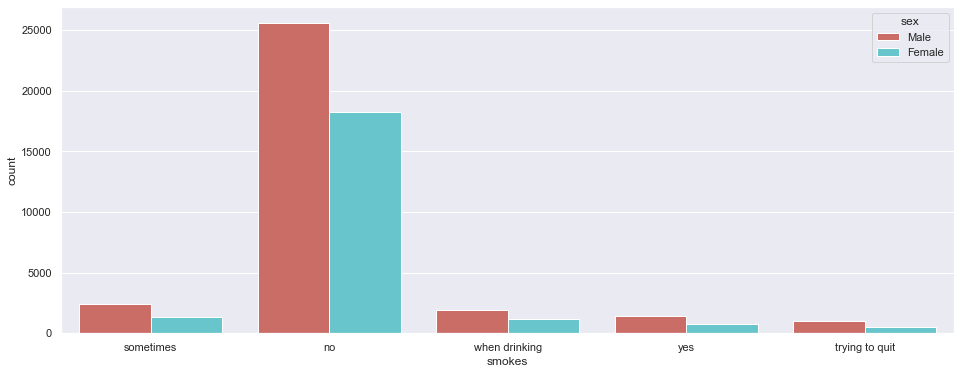

In [12]:
sns.set_theme()
plt.figure(figsize=(16, 6))
sns.countplot(x='smokes', hue= 'sex', data=df, palette= 'hls')

We can take some insight from this plot.

* *There are much more non-smokers then smokers*
* *The smoking status isn't defind in a binary way, there are 5 options* 
* *In every group, the ratio between Females and Males stays the same as the general ratio of this dataframe*

### Data Preperation

### Missing Data

Missing data is often not handled by machine learning algorithms well and have to be checked so they may need to be imputed or removed. It seems that many of the columns do have missing values. 

In [13]:
df.isnull().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

We need to clean and pre-process the data before we can apply on it machine-learning models.

- In order to apply machine-learing on the data, we need to turn the values to numeric. I apply 'map' function in order to convert the categorical values of the 'smokes' column to categorical-numeric values.
- The 'smokes' column will be our 'target' column and we will try to predict if a person is a smoker or not. So, for the sake of this purpose we will convert the values in this column to binary values.
- We will preprocess the other relevant columns too

In [14]:
df['smokes'] = df['smokes'].map(lambda row: 0 if row == 'no' else 1)
df['smokes'].value_counts()

0    43896
1    16050
Name: smokes, dtype: int64

In [15]:
df['drinks'].value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

In [16]:
df['drinks'] = df['drinks'].map({'not at all':0,'rarely':1,'socially':2,'often':3,'very often':4,'desperately':5})
df['drinks'].value_counts()

2.0    41780
1.0     5957
3.0     5164
0.0     3267
4.0      471
5.0      322
Name: drinks, dtype: int64

In [17]:
df['body_type'].value_counts()

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

In [18]:
df['body_type'] = df['body_type'].map({'skinny':0,'thin':1,'athletic':2,'fit':3,'jacked':4,'average':5,'a little extra':6,'curvy':7,'full figured':8,'overweight':9,'used up':10,'rather not say':11})
df['body_type'].value_counts()

5.0     14652
3.0     12711
2.0     11819
1.0      4711
7.0      3924
6.0      2629
0.0      1777
8.0      1009
9.0       444
4.0       421
10.0      355
11.0      198
Name: body_type, dtype: int64

In [19]:
df['orientation'].value_counts()

straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64

In [20]:
df['orientation'] = df['orientation'].map({'straight':0,'bisexual':1,'gay':2})
df['orientation'].value_counts()

0    51606
2     5573
1     2767
Name: orientation, dtype: int64

In [21]:
df['sex'] = df['sex'].map({'Female':1,'Male':0})
df['sex'].value_counts()

0    35829
1    24117
Name: sex, dtype: int64

In [22]:
df['diet'].value_counts()

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: diet, dtype: int64

Here we can see that there is too many categorical options in the 'diet' column. I will merge close values (like 'kosher' and 'strictly kosher') to one bin and sum the values.

in order to do that we need to clean our dataframe from the rows that miss data in the relevant columns. 

In [23]:
columns = ['smokes','orientation','body_type','sex','drinks','income','age','height','diet']
df = df.dropna(subset = columns)
clean_diet = []
for i in range(len(df)):
    if len(df.iloc[i]['diet'].split()) > 1:
        word = df.iloc[i]['diet'].split()
        clean_diet.append(word[1])
    else:
        word = df.iloc[i]['diet'].split()
        clean_diet.append(word[0])
        

In [24]:
df['diet'] = clean_diet
df['diet'].value_counts()

anything      26206
vegetarian     4500
other          1665
vegan           613
kosher          107
halal            67
Name: diet, dtype: int64

In [25]:
df['diet'] = df['diet'].map({'vegetarian':0,'vegan':1,'kosher':2,'halal':2,'other':3,'anything':4})
df['diet'].value_counts()

4    26206
0     4500
3     1665
1      613
2      174
Name: diet, dtype: int64

#### Now, our data is ready for machine-learning models applying, lets see the corrolation intensity between the columns.

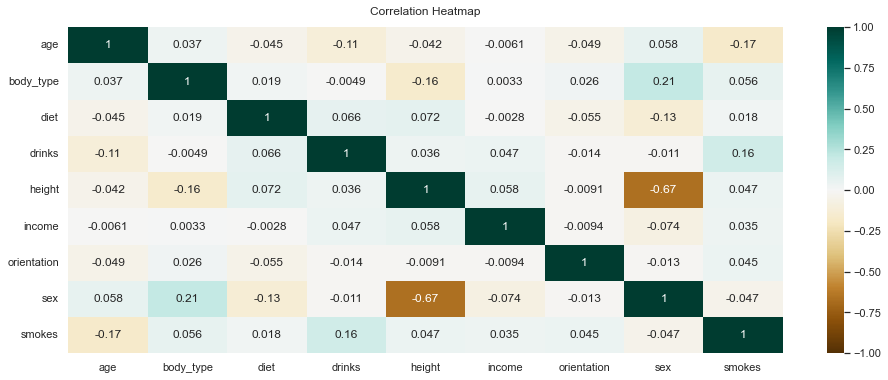

In [26]:
columns = ['smokes','orientation','body_type','sex','drinks','income','age','height','diet']
# del df1['diet']
# print(df1.shape)
# df1.head()

# df[columns].corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

What we can learn from this correlation heat-map?

* the strongest correlation in this map (negative correlation in this case) is between sex and height, it's reasnable, males tend to be taller. 
* the strongest correlations with smoking - our target column - is age and drking. the correlation with age is negative and the correlation with drinking is positive. That's mean that the chances that person is a smoker decreasing as his age is increasing, meanwhile - the chance that  this person smoking increas if we know that he is drinking.   

In [27]:
df[columns].head()

,smokes,orientation,body_type,sex,drinks,income,age,height,diet
0,1,0,6.0,0,2.0,-1,22,75.0,4
1,0,0,5.0,0,3.0,80000,35,70.0,3
2,0,0,1.0,0,2.0,-1,38,68.0,4
3,0,0,1.0,0,2.0,20000,23,71.0,0
5,0,0,5.0,0,2.0,-1,29,67.0,4


### Data normalization

We can see above the five first rows of our relevant columns of the dataframe. we process the data so that it will fit to macine-learing models. Nevertheless, some columns include very big values like the 'income' column and other columns include only 'zero's and 'one's. This situation could cause significant diversions in the modles because the the columns with the big values will get much more 'weight' then the binary-values columns.

So, in order to avoid that - we will normalize our data with Z-normalization. 

In [28]:
from sklearn import preprocessing
relevent_df = df[columns]
X = relevent_df.iloc[:,1:len(relevent_df.columns)]
y = relevent_df.iloc[:,0:1]
normalized_df=(relevent_df-relevent_df.mean())/relevent_df.std()

normalized_df.head()

,smokes,orientation,body_type,sex,drinks,income,age,height,diet
0,1.785231,-0.360509,1.109680,-0.802337,0.119775,-0.219626,-1.064799,1.674525,0.468971
1,-0.560135,-0.360509,0.627328,-0.802337,1.512310,0.521131,0.308497,0.409450,-0.242641
2,-0.560135,-0.360509,-1.302080,-0.802337,0.119775,-0.219626,0.625412,-0.096580,0.468971
3,-0.560135,-0.360509,-1.302080,-0.802337,0.119775,-0.034430,-0.959161,0.662465,-2.377478
5,-0.560135,-0.360509,0.627328,-0.802337,0.119775,-0.219626,-0.325332,-0.349595,0.468971


## Prediction models - Supervised macine-learning

Now, when our data is normalized - we can start applying machine-learing models on it.

First step - we i will separate the data to 'training data' and to 'validation data'

In [29]:
from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(normalized_df, y, test_size=0.25, random_state = 100)

y_train = y_train.to_numpy().ravel()
y_val = y_val.to_numpy().ravel()

In this section we will apply two common algorithms to predict our target - is a user is a smoker or not?

- The first one - **Logistic Regression**.
- The second - **K Nearest Neighbors** (KNN)

#### Evaluation Metrics

In the models, there will be several values that can be evaluated below is a quick diagram:
![](https://miro.medium.com/max/1400/1*UVP_xb4F6J-M-xH3haz5Jw.png)
here is a quick description of the metrics:

- **Accuracy:** is the correct values divided by total values
- **Precision:** is the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values.
- **Recall:** is the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses.
- **F1-score:** is a blended score of precision and recall which balances both values.
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict. 

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_predictions = lr_model.predict(X_val)

# lets see the confusion matrix:

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val,lr_predictions))

[[6309    0]
 [   0 1981]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_val, lr_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6309
           1       1.00      1.00      1.00      1981

    accuracy                           1.00      8290
   macro avg       1.00      1.00      1.00      8290
weighted avg       1.00      1.00      1.00      8290



In [32]:
print(lr_model.predict_proba(X_val))

[[9.99912387e-01 8.76132336e-05]
 [5.70437895e-04 9.99429562e-01]
 [4.90943980e-04 9.99509056e-01]
 ...
 [9.99810289e-01 1.89711435e-04]
 [7.33308838e-04 9.99266691e-01]
 [9.99845601e-01 1.54398759e-04]]


**The Logistic Regrassion algorithm did a great job a predict correctly the smoking statues of every person in the validation data.** 

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_val)
print(confusion_matrix(y_val,knn_predictions))

[[6309    0]
 [  42 1939]]


In [34]:
print(classification_report(y_val, knn_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6309
           1       1.00      0.98      0.99      1981

    accuracy                           0.99      8290
   macro avg       1.00      0.99      0.99      8290
weighted avg       0.99      0.99      0.99      8290



**Model Accuracy, how often is the classifier correct?**

In [37]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_val, knn_predictions))

Accuracy: 0.9949336550060314


We can see that the KNN algorithm did also good job but it wasn't perfect. Let's see if we can improve our model by choosing another number of 'k'.

In [35]:
accu = []

for i in range(1,201,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_val)
    accu.append(metrics.accuracy_score(y_val, y_pred))

<AxesSubplot:>

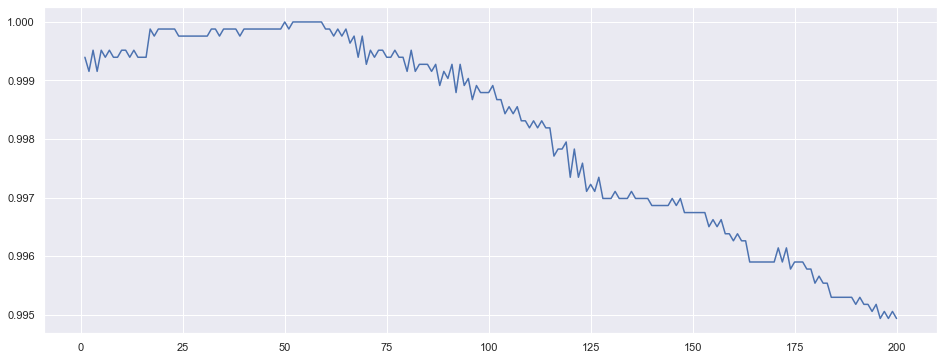

In [36]:
values = [val for val in range(1,201)]    
# len(k_values)
plt.figure(figsize=(16, 6))
sns.lineplot(x = values,y = accu)


From the graph above we can see that this model will do the best job if it will establish it's predictions on the 55 nearest neighbors.

In [50]:
knn = KNeighborsClassifier(n_neighbors=55)
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_val)
print(confusion_matrix(y_val,knn_predictions))

[[6309    0]
 [   0 1981]]


And.. it realy did!.

## Prediction models - Unsupervised macine-learning

In this section we will do a different thing. Instead of tring to predict the smoking status of user, we will try to classify users to clusters and then - find some insight about the differences between the clusters.

We will use the K-Means algorithm to do that.

In [39]:
from sklearn.cluster import KMeans

num_clusters = [i for i in range(1,8)]
inertias = []
for k in num_clusters:
    model = KMeans(n_clusters = k)
    model.fit(df[columns])
    inertias.append(model.inertia_)

<AxesSubplot:>

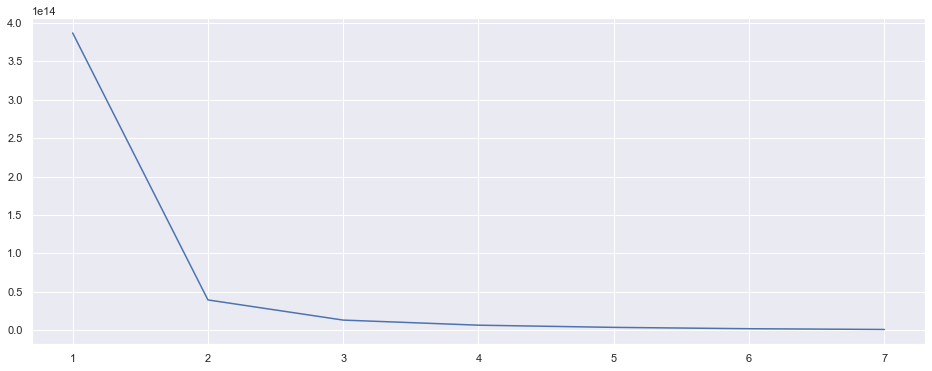

In [40]:
plt.figure(figsize=(16, 6))
sns.lineplot(x = num_clusters,y = inertias)

From the graph above we can see the more then three clusters will not make our clusters much more concentrate then 3. So we will choose to run this model with 3 differnt clusters.

In [47]:
classifier = KMeans(n_clusters = 3)
classifier.fit(normalized_df)
print(classifier.cluster_centers_)

[[ 0.04184235 -0.34191104 -0.17565389 -0.79846703  0.02198841  0.07917054
  -0.04938715  0.56228492  0.1237603 ]
 [-0.0802143  -0.20388371  0.26095899  1.23564574 -0.01220993 -0.10059741
   0.09285131 -0.84860022 -0.15126298]
 [ 0.080622    3.00948718 -0.01496953 -0.27895678 -0.08545057 -0.06591339
  -0.08736121  0.10445976 -0.12861477]]


In [58]:
cluster_zero_indices = []
cluster_one_indices = []
cluster_two_indices = []
for i in range(len(classifier.labels_)):
    if classifier.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif classifier.labels_[i] == 1:
        cluster_one_indices.append(i)
    else:
        cluster_two_indices.append(i)
print(len(cluster_zero_indices))
print(len(cluster_one_indices))
print(len(cluster_two_indices))

18001
12277
2880


In [53]:
# labels = classifier.predict(normalized_df)
# a_set = set(labels)
# number_of_unique_values = len(a_set)
# number_of_unique_values
# x = normalized_df.iloc[:,5]
# y = normalized_df.iloc[:,7]
# plt.figure(figsize=(16, 6))
# plt.scatter(x, y, c = labels, alpha = 0.5)

Text(0.5, 1.0, 'Cluster Two')

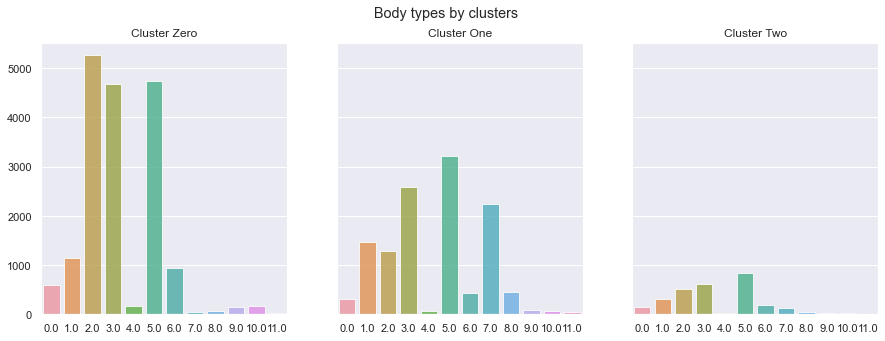

In [60]:
cluster_zero_df = df.iloc[cluster_zero_indices]
cluster_one_df = df.iloc[cluster_one_indices]
cluster_two_df = df.iloc[cluster_two_indices]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Body types by clusters')

body_shape_count0 = cluster_zero_df['body_type'].value_counts()
sns.barplot(ax = axes[0], x = body_shape_count0.index, y = body_shape_count0.values,alpha=0.8)
axes[0].set_title('Cluster Zero')

body_shape_count1 = cluster_one_df['body_type'].value_counts()
sns.barplot(ax = axes[1], x = body_shape_count1.index, y = body_shape_count1.values,alpha=0.8)
axes[1].set_title('Cluster One')

body_shape_count2 = cluster_two_df['body_type'].value_counts()
sns.barplot(ax = axes[2], x = body_shape_count2.index, y = body_shape_count2.values,alpha=0.8)
axes[2].set_title('Cluster Two')


**'skinny':0** , **'thin':1** , **'athletic':2** , **'fit':3** , **'jacked':4** , **'average':5** , **'a little extra':6** , **'curvy':7** , **'full figured':8** , **'overweight':9** , **'used up':10** , **'rather not say':11**

The users form clusters 1 and 2 thend to be mainly with 'Average' and 'Fit' body type, the users from cluster zero tend to be more 'Athletic'. 

[Text(0, 0, 'N/a'),
 Text(1, 0, '20k'),
 Text(2, 0, '30k'),
 Text(3, 0, '40k'),
 Text(4, 0, '50k'),
 Text(5, 0, '60k'),
 Text(6, 0, '70k'),
 Text(7, 0, '80k'),
 Text(8, 0, '100k'),
 Text(9, 0, '150k'),
 Text(10, 0, '250k'),
 Text(11, 0, '500k'),
 Text(12, 0, '1M')]

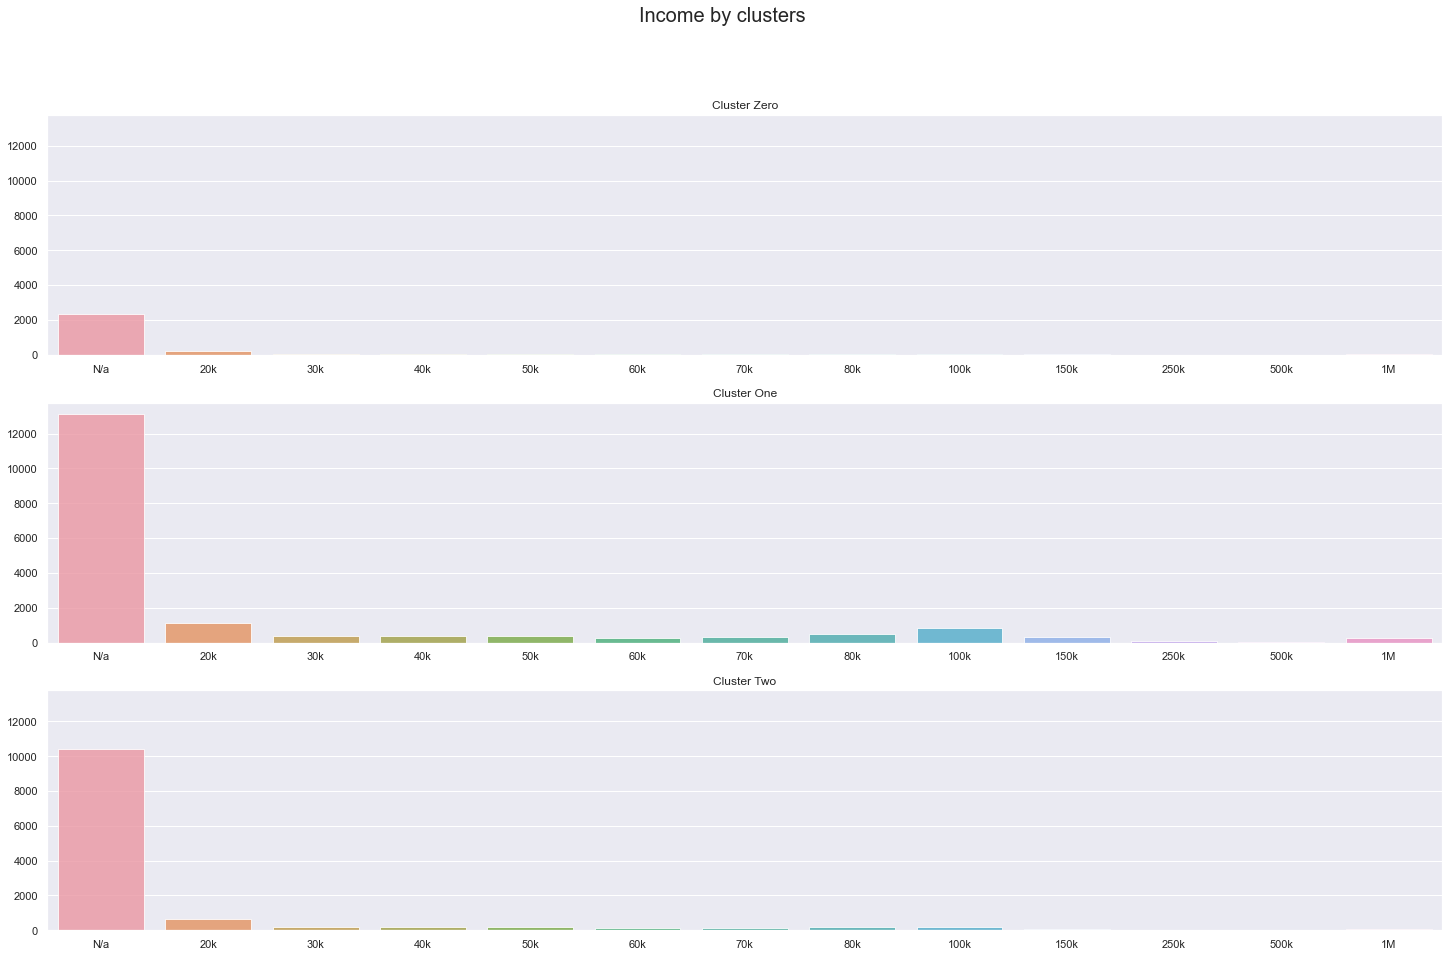

In [61]:
fig, axes = plt.subplots(3, 1, figsize=(25, 15), sharey=True)
fig.suptitle('Income by clusters', fontsize= 20)

body_shape_count0 = cluster_two_df['income'].value_counts()
sns.barplot(ax = axes[0], x = body_shape_count0.index, y = body_shape_count0.values,alpha=0.8)
axes[0].set_title('Cluster Zero')
axes[0].set_xticklabels(['N/a','20k','30k','40k','50k','60k','70k','80k','100k','150k','250k','500k','1M'])

body_shape_count1 = cluster_zero_df['income'].value_counts()
sns.barplot(ax = axes[1], x = body_shape_count1.index, y = body_shape_count1.values,alpha=0.8)
axes[1].set_title('Cluster One')
axes[1].set_xticklabels(['N/a','20k','30k','40k','50k','60k','70k','80k','100k','150k','250k','500k','1M'])

body_shape_count2 = cluster_one_df['income'].value_counts()
sns.barplot(ax = axes[2], x = body_shape_count2.index, y = body_shape_count2.values,alpha=0.8)
axes[2].set_title('Cluster Two')
axes[2].set_xticklabels(['N/a','20k','30k','40k','50k','60k','70k','80k','100k','150k','250k','500k','1M'])


From this graph we can learn that users from clusters one and two spread all across the 'income' graph, users from cluster zero we can find only in the lower income area or 'N/a'. 
In addition - we can see that in cluster one - there is much more users in the area of high income (100k-150k and even 1M) then cluster two.